In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # sklearn package's randomised data split function

<h1>1. Understanding data.</h1>

    Looking at the data below to find out the mean, deviation, quartiles, null values ,<br>
    columns and rows to get a sense of the data in terms of kind of datatypes , missing values etc.

In [2]:
ldata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
ldata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
ldata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


As seen above the following observations can be made.(To dig deeper into the distributions and relationships we will do univariate and bivariate analysis later)
<!--Ignoring the ID column, we will remove it later  -->
<b>Age</b> - has a mean of 45, and a median of 45. Max age is 67 and 75% of population is 55 or less.<br>
<b>Experience</b> - The mean and 50% population experience is around 20 years 75% people have an experience of 30 years or less and max experience is around 43 years.<br>
The minimum value is given as -3, will have to check on this in the later analysis as experience cannot be negative.<br>
<b>Income</b>- The income mean is around 74K dollars ranging from a min of 8K dollars to a max of 224K dollars.The median income is 64K$.<br> Note:-The annual earnings for a full-time minimum-wage worker is dollar 15K at the current federal minimum wage of dollar 7.25. Seems like some people are earning lesser than minimum wage in the US.<br>
<b>Family</b> - The family size ranges from a minimum of 1 to a maximum of 4 in the dataset, the mean and median indicate that the average family size is 2. <br>(It would be interesting to know how many are married, with children [prefer stability, should opt for loans], divorced [chances of paying alimony] etc to look at the pattern.)We will <b>assume</b> that 3 and 4 member family correspond to husband spouse, and children.  
<br>
<b>CCAvg- credit card spending avg(dollar in thousands per month)</b> - The credit card averages in thousand dollars range from a minimum of 0 to a maximum of 10K per month the mean comes to around 1.93K and the median at 1.50k<br>
<b>Education</b>The education varies from 1- undergrad to 3- Advanced professional. 50\% people are graduates or less and 75\% people are Advanced professionals or less.<br>
Similarly for other columns we can look at the max min , median and mean values.<br>
More insights on the column can be derived when we do the univariate and bivariate analysis on the data distributions.


<b>Mortgage</b> The mortgage has a mean of 56.49 K and median of 0. Whereas 75\% of people have mortgage less than 101K, and max value is 635K. We can see that the data seems to have a high amount of skew. Will be interesting to look at this in the univariate analysis.

In [4]:
ldata.shape

(5000, 14)

In [5]:
# checking for datatypes
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<h1> validity of data</h1>
There seems to be no missing data , but we have seen in the above eda description analysis that the <b>experience</b> field has a minimum value of -3 which needs to be corrected. 

In [6]:
# checking for null values or missing values
ldata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# checking for null values or missing values , another way.
ldata.isnull().values.any()


False

In [8]:
# checking the unique values for some of the columns just to get an idea of variation across values
print(ldata['Age'].unique().tolist())
# print(ldata['ZIP Code'].unique().tolist()
# print(ldata['Family'].unique().tolist())


[25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46, 55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62, 58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23]


In [9]:
print(ldata['Experience'].unique().tolist())


[1, 19, 15, 9, 8, 13, 27, 24, 10, 39, 5, 23, 32, 41, 30, 14, 18, 21, 28, 31, 11, 16, 20, 35, 6, 25, 7, 12, 26, 37, 17, 2, 36, 29, 3, 22, -1, 34, 0, 38, 40, 33, 4, -2, 42, -3, 43]


In [10]:
print(ldata['Family'].unique().tolist())

[4, 3, 1, 2]


In [11]:
print(ldata['ZIP Code'].unique().tolist())

[91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023, 94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604, 94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117, 94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019, 95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245, 95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123, 90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305, 95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612, 95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037, 95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833, 94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720, 90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423, 93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053, 90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503, 93111, 94132, 95818, 91942, 90401, 93524, 95133, 92173, 94043, 92521, 92122, 93118, 92697, 94577, 91345, 94123, 92152

In [12]:
experience = ldata[ldata['Experience'] < 0]
experience['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

As given above we have -1, -2 and -3 as negative values for the experience category with total 52 records.
We have the choice of either deleting the records or converting these experiences to a logical value. We take one of the approach later.Since there are 52 records which is around 52*100/5000 1\% of the total records substituting by 0 looks like a good option.

In [13]:
#  Function to check for non datatype values for the list
def check_type(column_values, datatype):
    for value in column_values:
        if isinstance(value, datatype):
            print("value is valid")
            return True
    print("value is invalid")
    return False

In [14]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [15]:
check_type(ldata['ZIP Code'].unique().tolist(), int)

value is valid


True

In [16]:
check_type(ldata['Experience'].unique().tolist(), int)

value is valid


True

In [17]:
check_type(ldata['Income'].unique().tolist(), int)

value is valid


True

In [18]:
check_type(ldata['CCAvg'].unique().tolist(), float)

value is valid


True

In [19]:
check_type(ldata['Family'].unique().tolist(), int)

value is valid


True

In [20]:
check_type(ldata['Education'].unique().tolist(), int)

value is valid


True

In [21]:
check_type(ldata['Mortgage'].unique().tolist(), int)

value is valid


True

In [22]:
check_type(ldata['Personal Loan'].unique().tolist(), int)

value is valid


True

In [23]:
check_type(ldata['Securities Account'].unique().tolist(), int)

value is valid


True

In [24]:
check_type(ldata['CD Account'].unique().tolist(), int)

value is valid


True

In [25]:
check_type(ldata['Online'].unique().tolist(), int)

value is valid


True

In [26]:
check_type(ldata['CreditCard'].unique().tolist(), int)

value is valid


True

<h1>2.Study the data distribution in each attribute, share your findings</h1>

<b> Univariate Analysis

In [27]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


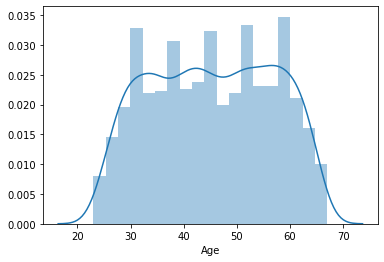

In [28]:
sns.distplot(ldata.Age)

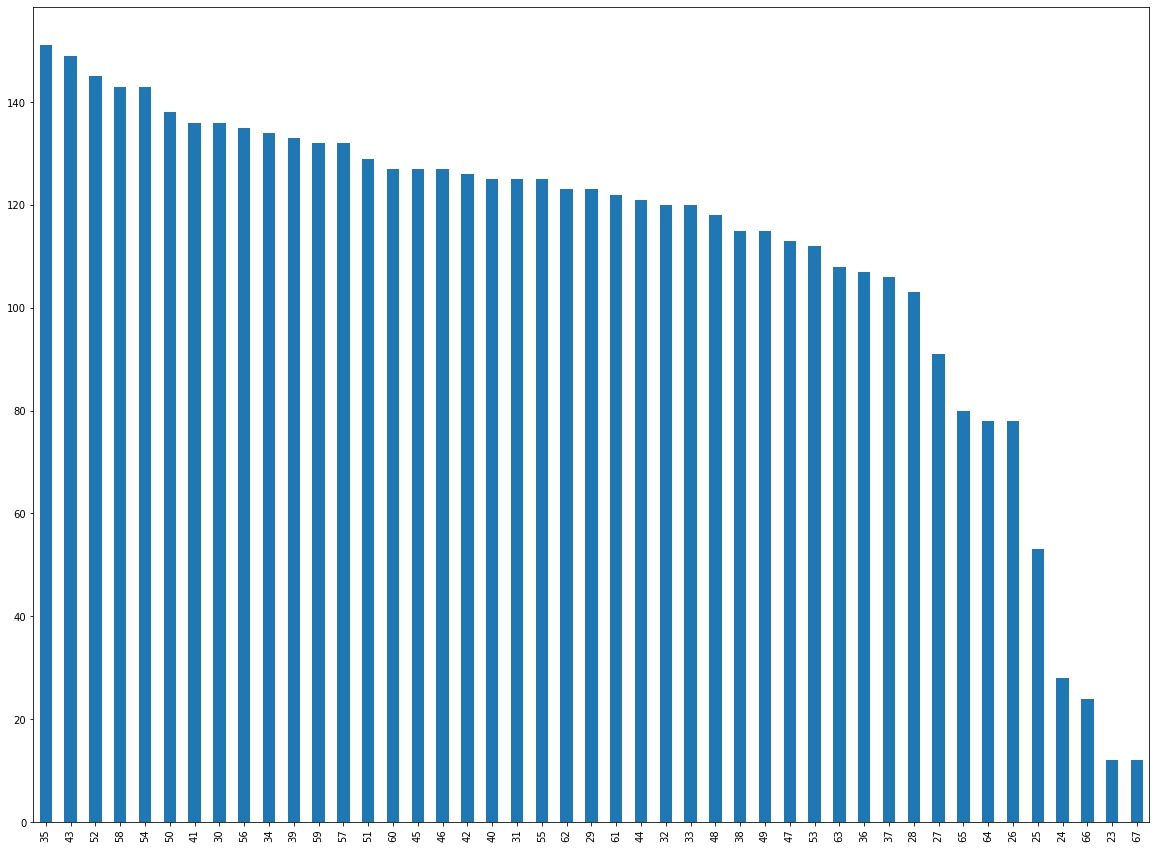

In [29]:
plt.figure(figsize=(20,15))
ldata['Age'].value_counts().sort_values(ascending=False).plot(x='Age',kind='bar')
plt.show()

The data is normally distributed across the age groups covering wide range of ages. However most customers are between 30 to 60 years of age.

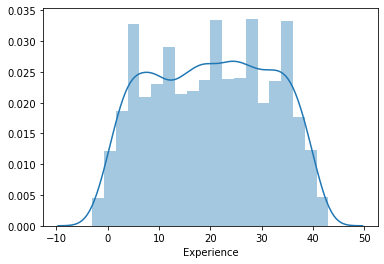

In [30]:
sns.distplot(ldata.Experience)

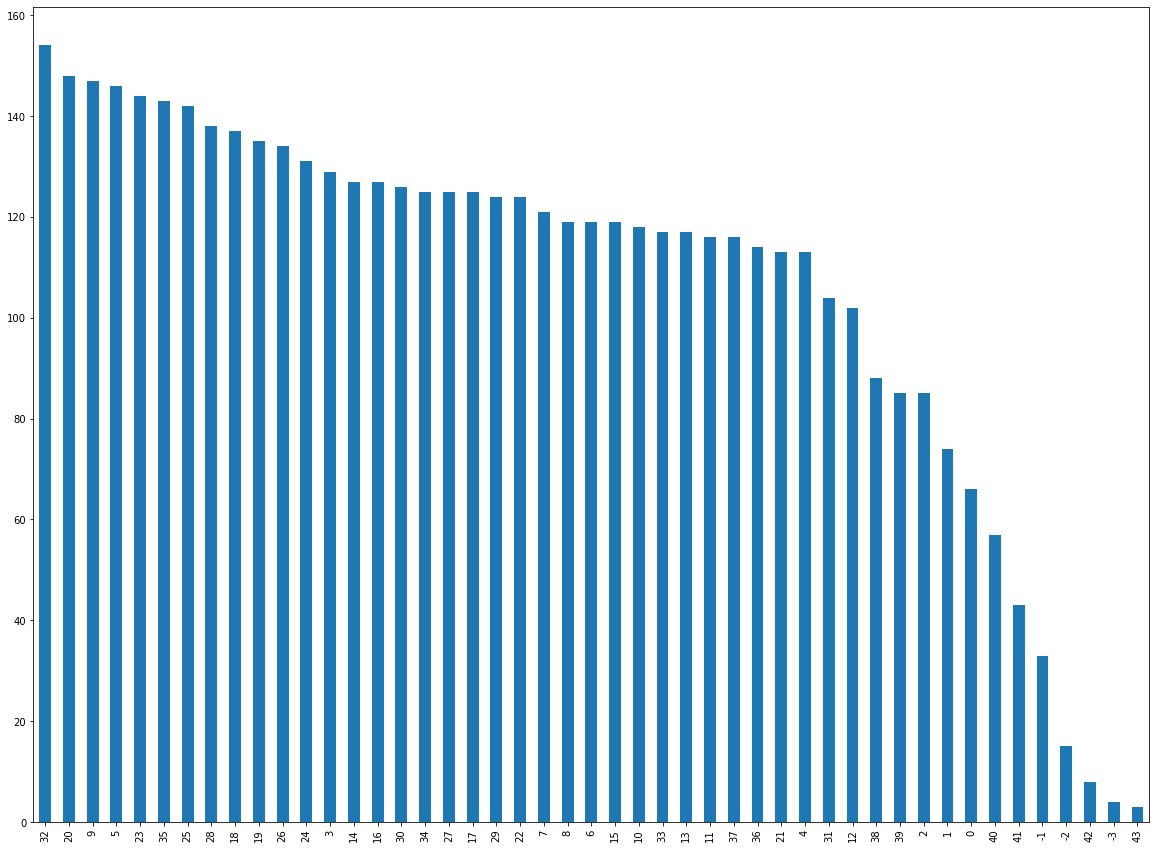

In [31]:
plt.figure(figsize=(20,15))
ldata['Experience'].value_counts().sort_values(ascending=False).plot(x='Age',kind='bar')
plt.show()

We can see that experience has around 1% of negative data. Apart from that the distribution is captured for a wide.
range and is normally distributed. The bar plot shows the distribution of various experiences

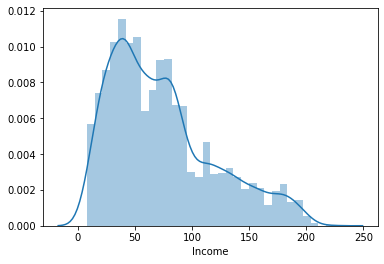

In [32]:
sns.distplot(ldata.Income)

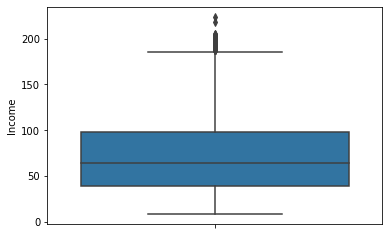

In [33]:
sns.boxplot(y=ldata.Income)

Income is positively skewed as can be seen in the boxplot above. Most incomes lie between 40 to 80 million. There are a few outliers that can be seen.

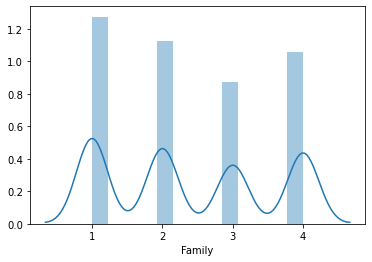

In [34]:
sns.distplot(ldata["Family"])

Most datapoints are for people who are single and the least with 3 family members.

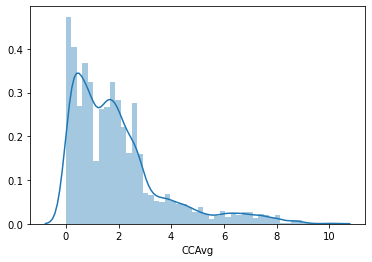

In [35]:
sns.distplot(ldata["CCAvg"])

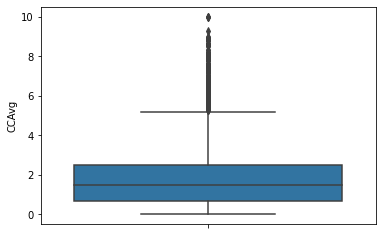

In [36]:
sns.boxplot(y=ldata.CCAvg)

CCAvg is positively skewed and has abundance of outliers. Values range from 0 to 10k , and majority of values are between 0 to 2.5K

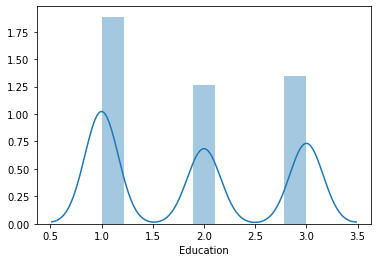

In [37]:
sns.distplot(ldata["Education"])

Most people are Undergrads and then Advanced/Professional . The graduate count is a little sess than the Advanced Professional count.

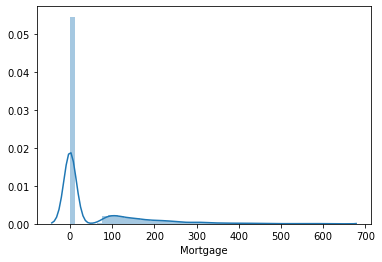

In [38]:
sns.distplot(ldata["Mortgage"])

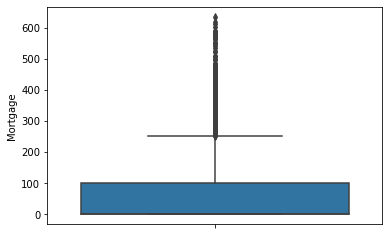

In [39]:
sns.boxplot(y=ldata.Mortgage)

Most people do not have any mortgages as can be seen from the distplot. THe distplot is heavily positively skewed. We can also see quite a number of outliers in the graph.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


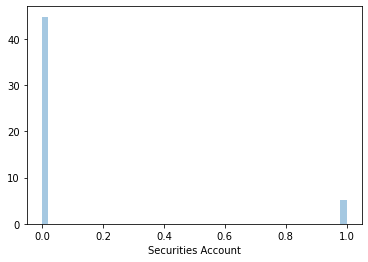

In [40]:
sns.distplot(ldata["Securities Account"])

Most people do not have securities account with the bank. Only a few have it as can be seen above

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


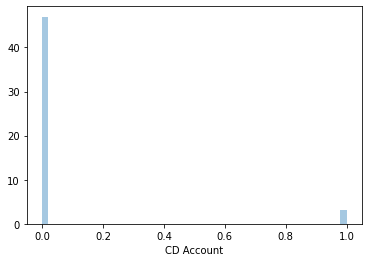

In [41]:
sns.distplot(ldata["CD Account"])

Most people do not have Certificate of deposit account with the bank. Only a few have it as can be seen above

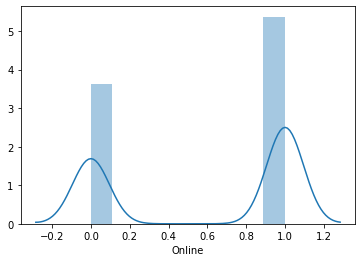

In [42]:
sns.distplot(ldata["Online"])

Most people have online banking account. But the people having non online account is also significant

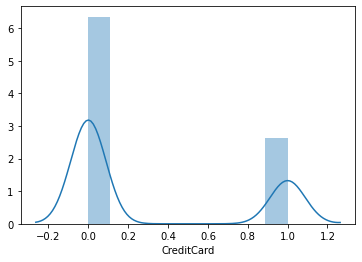

In [43]:
sns.distplot(ldata["CreditCard"])

Most people do not use credit card and ony a few do.

<h1>3. Get the target column distribution (and bivariate analysis) and relationship of the target column(Personal Loan with other columns)<h1>

<b>Filling in the missing value for experience</b><br>
So for the given fields above only the <b>experience</b> has negative values and the rest of the fields seem ok to go.
As mentioned earlier we can either look for similar records and take the median of the experience or we can just put the value of the negative experiences to 0. To make it a little interesting we are going to use age and education of the dataset and calculate the median experience and use it as the experience value for the negative entries.

In [44]:
dfExp = ldata.loc[ldata['Experience'] >=0]
negExp = ldata.Experience < 0
column_name = 'Experience'
mylist = ldata.loc[negExp]['ID'].tolist() 

In [45]:
df_filtered = dfExp[(dfExp.Age == 24) & (dfExp.Education == 2)]
df_filtered

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
105,106,24,0,35,94704,3,0.1,2,0,0,1,0,1,0
3908,3909,24,0,44,90638,3,0.1,2,0,0,0,0,0,0


In [46]:
for id in mylist:
    age = ldata.loc[np.where(ldata['ID']==id)]["Age"].tolist()[0]
    education = ldata.loc[np.where(ldata['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    ldata.loc[ldata.loc[np.where(ldata['ID']==id)].index, 'Experience'] = exp

In [47]:
# check if there are negative experiences
ldata[ldata['Experience'] < 0]['Experience'].count()

0

In [48]:
ldata.fillna(value=0,inplace=True)
ldata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [49]:
ldata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.123000,11.434860,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


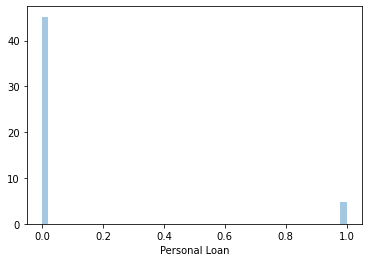

In [50]:
sns.distplot(ldata["Personal Loan"])

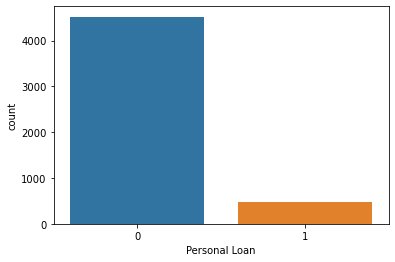

In [51]:
sns.countplot(x='Personal Loan',data=ldata)

In [141]:
ldata["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [143]:
ldata.groupby(ldata['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.152655,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


Most customers have not opted to go for a loan and a very few have.<br>
Given above is the breakup of different categories of people who have chosen to take personal loan vs the ones who haven't.<br>
The bar plot indicates the values for the same.
The averages gives us following indicators
The 

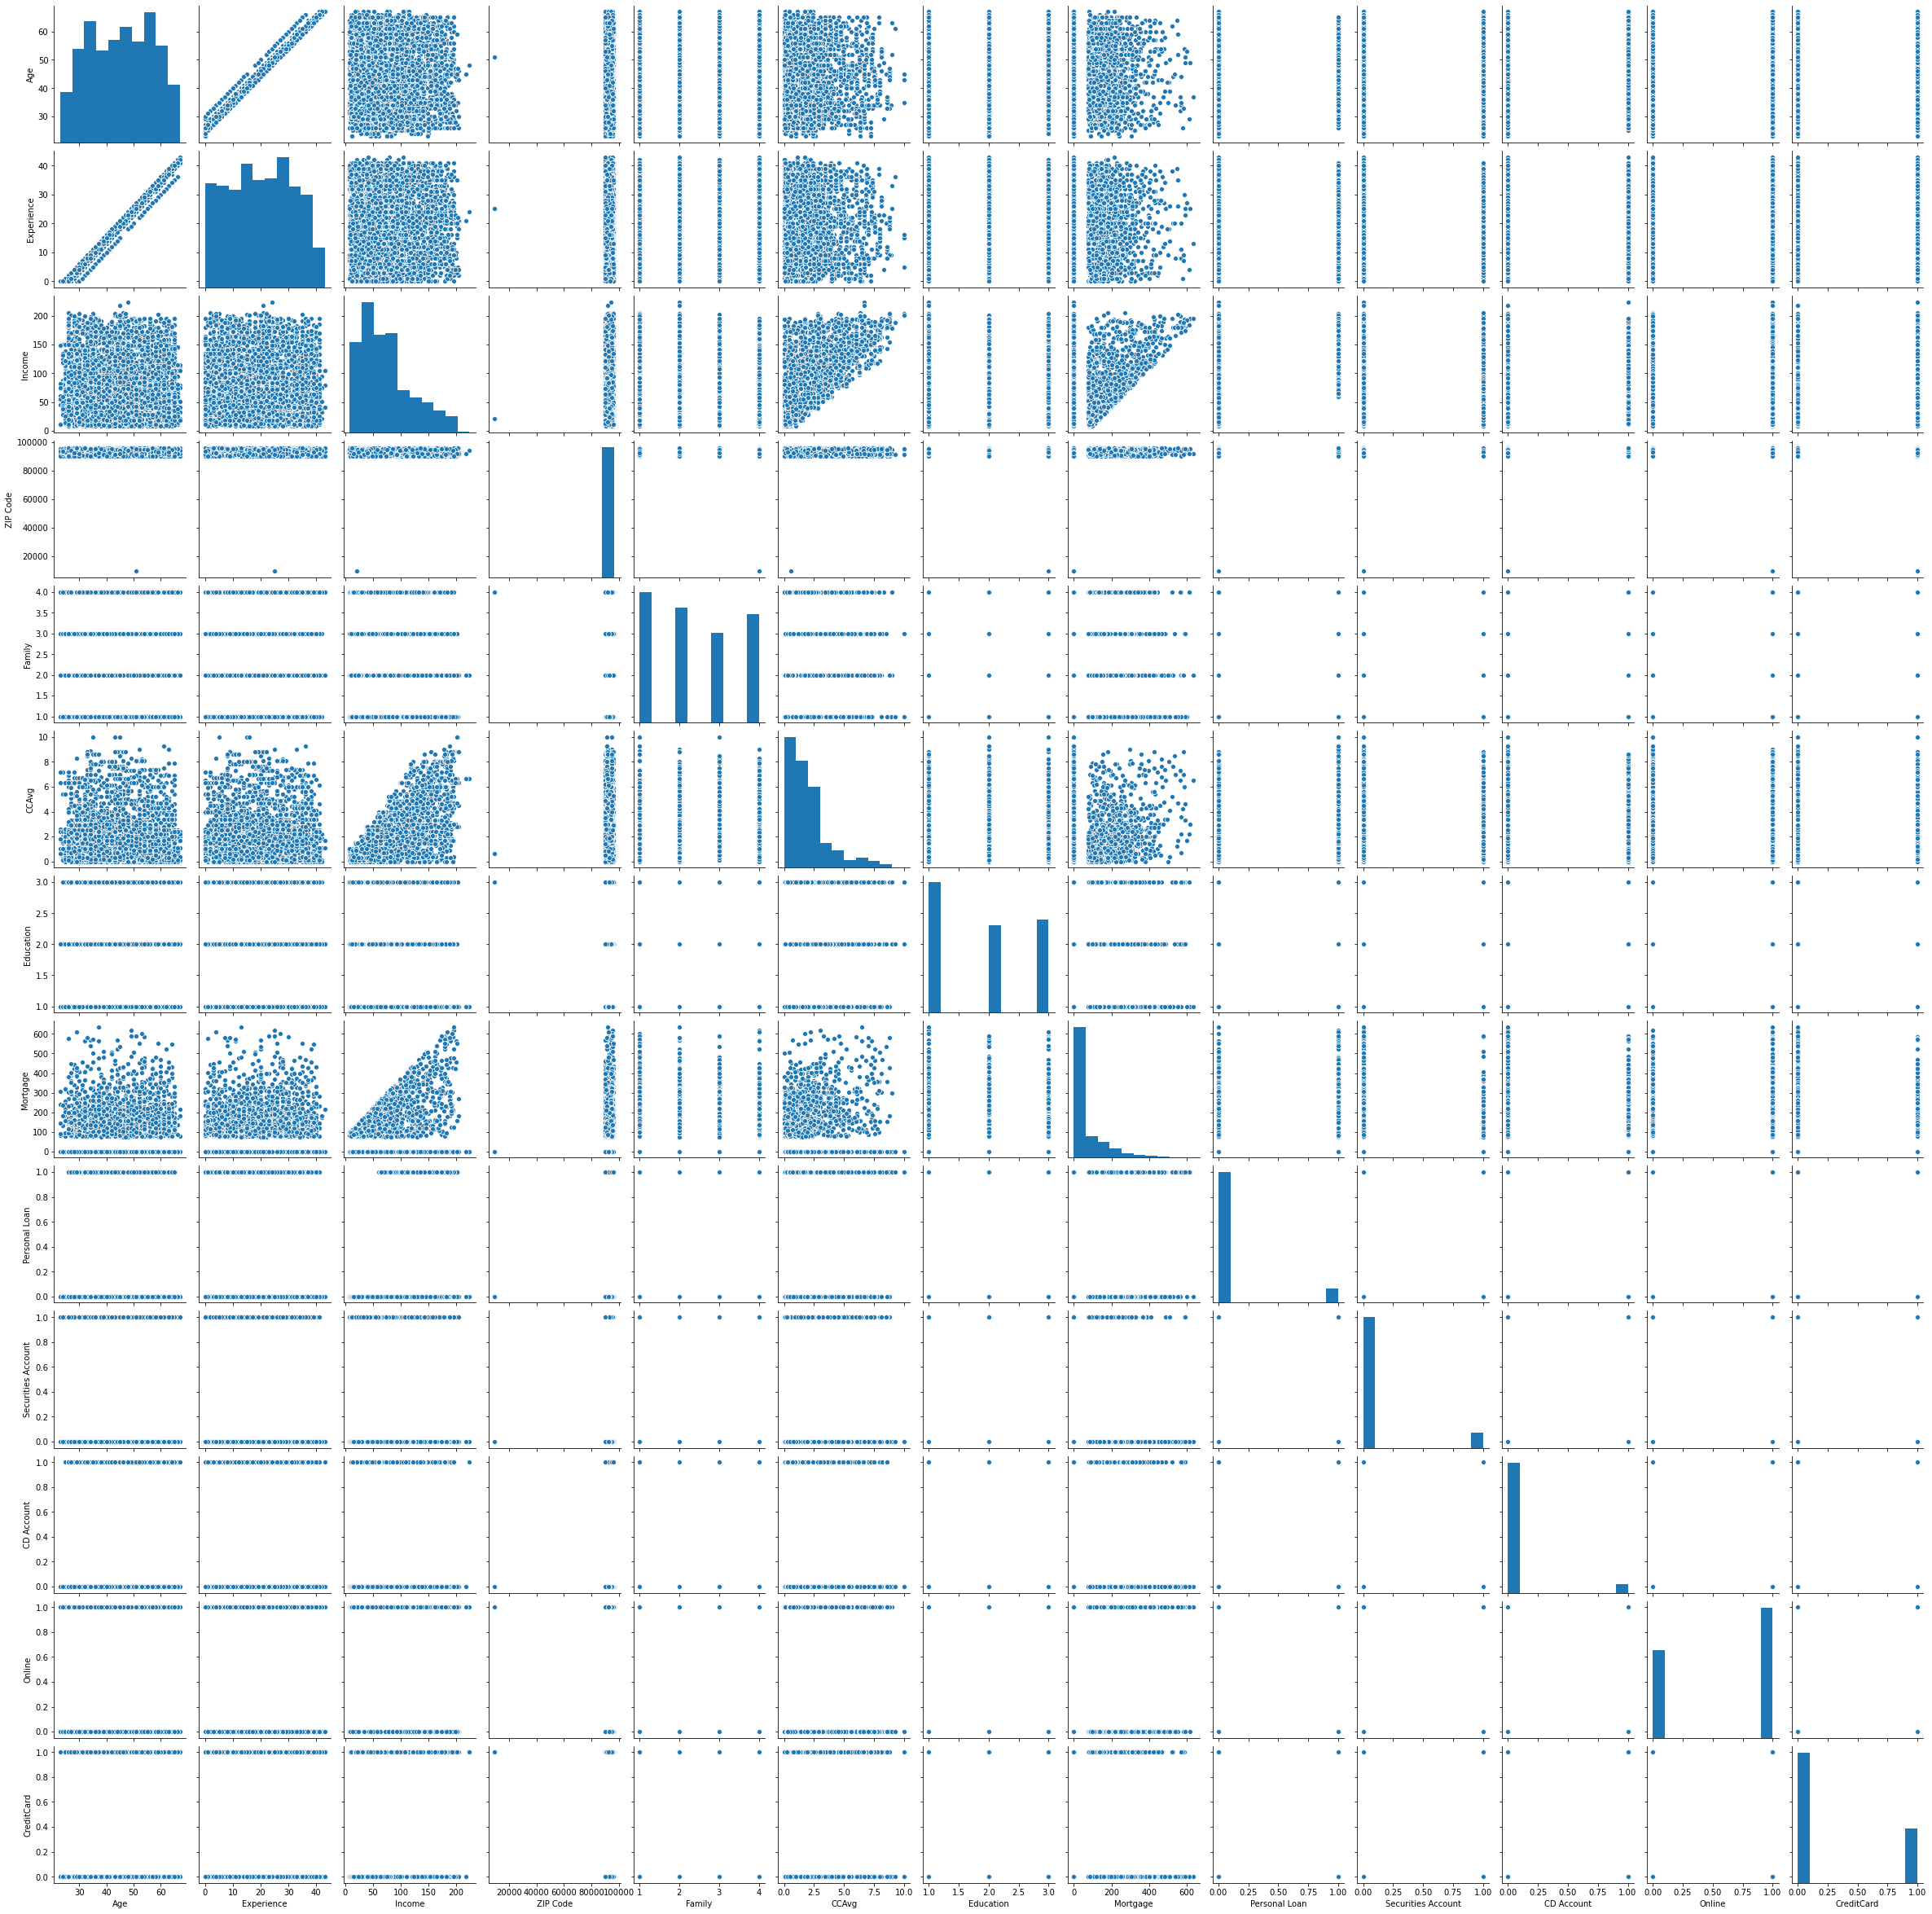

In [52]:
sns.pairplot(ldata.iloc[:,1:])

In the above plot , experience and age show a good correlation. We will explore interesting combinations below in more detail

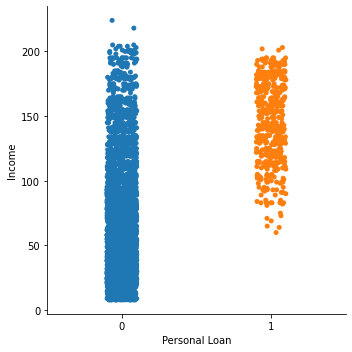

In [53]:
sns.catplot(y='Income', x='Personal Loan', data=ldata)

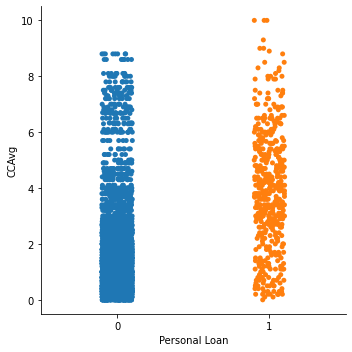

In [54]:
sns.catplot(y='CCAvg', x='Personal Loan', data=ldata)

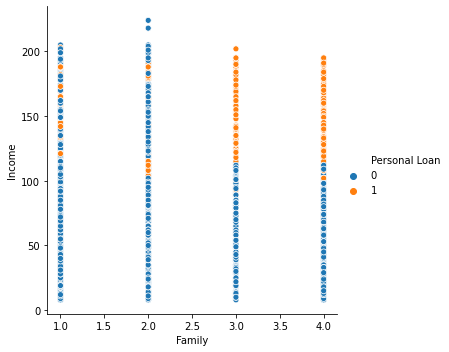

In [55]:
sns.relplot(x="Family", y="Income",hue="Personal Loan", data=ldata);

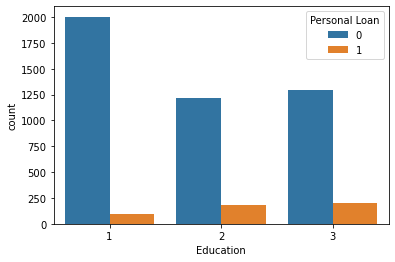

In [56]:
sns.countplot(x='Education', hue='Personal Loan',data=ldata)

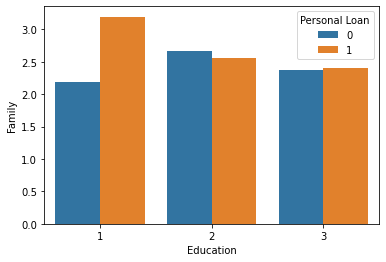

In [57]:
sns.barplot('Education','Family',hue='Personal Loan',data=ldata,ci=None)

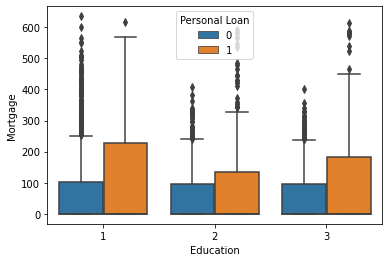

In [58]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=ldata)
plt.show()

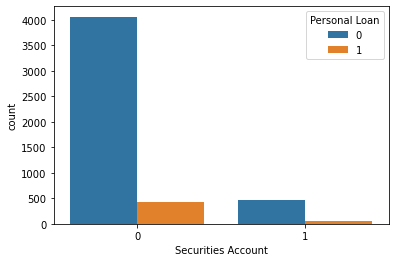

In [59]:
sns.countplot(x="Securities Account", data=ldata,hue="Personal Loan")

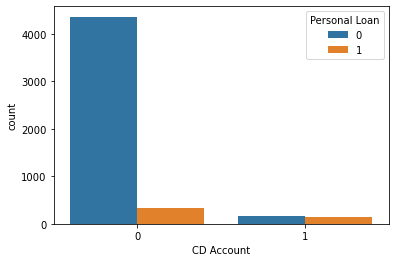

In [60]:
sns.countplot(x='CD Account',data=ldata,hue='Personal Loan')

<b>Explanation of above graphs</b><br>
A few relationships that can be seen above and are evident from both the pairplot and cat plot is <br>
<b>Income vs Personal Loan</b> The personal loans are more for income between 100 to 200k which mekes sense<br>
<b>CCAvg vs Personal Loan</b> The personal loans are more for credit card avg between 2 to 5.5<br>
<b>Family , income vs Personal Loan</b>Families with 3 and 4 with income above 100k have opted for loans which makes sense<br>
<b>Education vs Personal loan</b> Working graduates have taken more loan than graduates and Under graduates, which is expected.<br>
<b>Education , Family vs Personal loan</b> More Undergraduates with family with 3 or more members take personal loans than the other categories.
<b>Mortgage, Education vs personal loan</b>High mortgage for both types of people, i.e with or without personal loan  <br>
<b>Securities account vs personal loan</b> Most of the customers who dont have a loan have securities account
<b>CD Account vs personal loan</b> Significant number of people who have a CD account have taken personal loan as compared to who to those who have a CD account and have not taken a loan(i.e the count of CD Account + no loan is only slightly greater ).



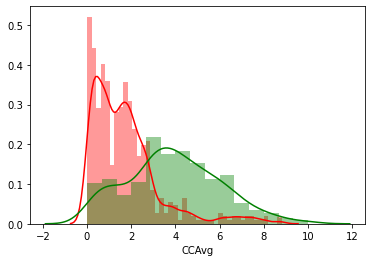

In [61]:
sns.distplot( ldata[ldata['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( ldata[ldata['Personal Loan'] == 1]['CCAvg'], color = 'g')
plt.show()

In [62]:
print('No loan credit card average',ldata[ldata['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Loan credit card average   : ', ldata[ldata['Personal Loan'] == 1]['CCAvg'].median()*1000)

No loan credit card average 1400.0
Loan credit card average   :  3800.0


The red graph shows the credit card average of people who have taken personal loan vs those who haven't.
We can gather from the graph that the people with personal loan have higher credit card average than the people who don't take personal loan.Which is also shown by the median values given above

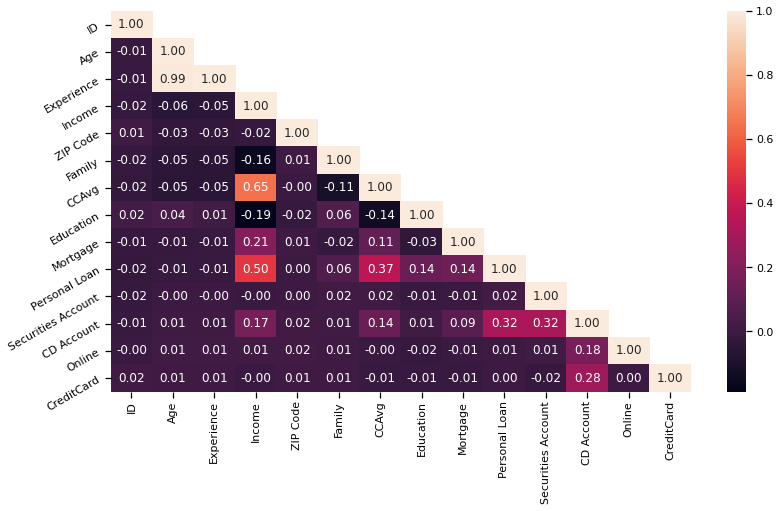

In [63]:

corr = ldata.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
msk = np.zeros_like(corr)
msk[np.triu_indices_from(msk, 1)] = True
a = sns.heatmap(corr,mask=msk, annot=True, fmt='.2f')
x = a.set_xticklabels(a.get_xticklabels(), rotation=90)
y = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Looking at the correlation we can see that income and ccavg are correlated to some extent<br>
Age and experience has a correlation of .99

<h1>4. Split the data into training and test set in the ratio of 70:30 respectively<h1>

<b>Building the Model</b><br>
We don't need the id field and zip code fields as they dont help in modelling <br>
We don't need experience and age as they have .99 correlation
We will target the personal loan field and take it into a separate array<br>
We will then create a split of 70 training and 30 test data ratio


In [64]:
ldata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [65]:
ldata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.12300,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.43486,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.00000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.00000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.00000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.00000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.00000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [66]:
X=ldata.drop(['ID','ZIP Code','Personal Loan', 'Experience'],axis=1)
Y=ldata['Personal Loan']

In [70]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

In [76]:
print(X.shape)
print(Y.shape)


(5000, 10)
(5000,)


In [68]:
# normalized_X = preprocessing.normalize(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

<h1>5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans</h1>

<b>Logistic Regression</b>

In [78]:
logistic_regression_value = LogisticRegression(solver = 'liblinear')
logistic_regression_value.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [80]:
y_pred = logistic_regression_value.predict(X_test)
print('Train set accuracy of logistic classifier : {:.2f}'.format(logistic_regression_value.score(X_train, y_train)))

Train set accuracy of logistic classifier : 0.95


In [81]:
test_score = logistic_regression_value.score(X_test, y_test)
print('Accuracy on test set classifier: {:.2f}'.format(test_score))

Accuracy on test set classifier: 0.94


In [82]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1338   13]
 [  73   76]]


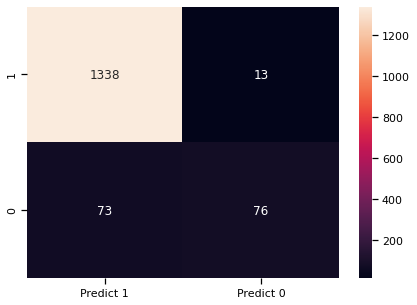

In [83]:
# use the seaborne library
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

We can see above that the first and fourth column of the matrix are the correct predictions(1338+76) while the second and third(13+73) are the wrong values. 

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.51      0.64       149

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



Performance metrics<br>
Precision: Fraction of actuals per label that were correctly classified by the model<br>
Recall: Fraction of predictions that were correctly classified by the model<br>
F1-score: Weighted harmonic mean of the precision and recall. F1-score: 2 (precision recall) / (precision + recall)<br>
Support: Number of occurrences of each class in y_test<br>
Accuracy: Fraction of all observations that were correctly classified by the model<br>
Macro avg: Calculate metrics for each label, and find their unweighted mean. This does not<br> take label imbalance into account<br>
Micro/weighted avg: Calculate metrics globally by counting the total true positives, false negatives and false positives<br>
AUC: Probability that a classifier will rank a random positive sample higher than than a random negative sample.<br>

In [85]:
print('Accuracy on train set: {:.2f}'.format(logistic_regression_value.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(logistic_regression_value.score(X_test, y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,y_pred)))
print('Precision score: {:.2f}'.format(precision_score(y_test,y_pred)))

Accuracy on train set: 0.95
Accuracy on test set: 0.94
Recall score: 0.51
ROC AUC score: 0.75
Precision score: 0.85


<b>Logistic Regression with Scaling</b>

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

0.948


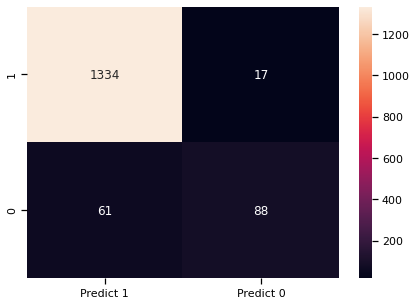

In [140]:
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
logreg_model = LogisticRegression(solver = 'liblinear')
logreg_model.fit(scaled_X_train,y_train)
y_pred = logreg_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')


With standardization technique there is an improvement in the accuracy of the data as can be seen above, as the disparate standards have been brought down to similar standard values.

<b>KNN ( K - Nearest Neighbour ) </b>

In [86]:
X=ldata.drop(['ID','ZIP Code','Personal Loan', 'Experience'],axis=1)
Y=ldata['Personal Loan']

In [89]:
print(X.shape)
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

(5000, 10)
(5000,)


In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [114]:
y_pred = knn_classifier.predict(X_test)

In [115]:
score = knn_classifier.score(X_train, y_train)
print("training set score of knn classifier is ",score)

training set score of knn classifier is  0.9245714285714286


In [116]:
score = knn_classifier.score(X_test, y_test)
print("testing set score of knn classifier is ",score)

testing set score of knn classifier is  0.9106666666666666


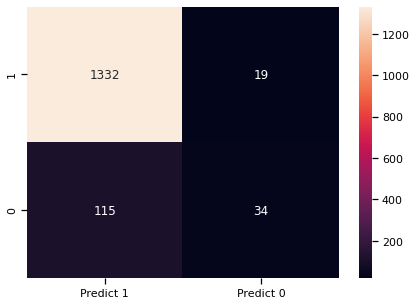

In [117]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1351
           1       0.64      0.23      0.34       149

    accuracy                           0.91      1500
   macro avg       0.78      0.61      0.64      1500
weighted avg       0.89      0.91      0.89      1500



In [119]:
print('Accuracy on train set: {:.2f}'.format(knn_classifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(knn_classifier.score(X_test, y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,y_pred)))
print('Precision score: {:.2f}'.format(precision_score(y_test,y_pred)))

Accuracy on train set: 0.92
Accuracy on test set: 0.91
Recall score: 0.23
ROC AUC score: 0.61
Precision score: 0.64


In [120]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9086666666666666, 0.9073333333333333, 0.9093333333333333, 0.9066666666666666, 0.906, 0.906, 0.9026666666666666, 0.908, 0.9053333333333333, 0.9106666666666666, 0.908, 0.9066666666666666, 0.908, 0.9066666666666666, 0.9066666666666666, 0.906, 0.9073333333333333, 0.9053333333333333, 0.904, 0.904, 0.9033333333333333, 0.902, 0.9, 0.902, 0.9]


Text(0, 0.5, 'Testing Accuracy')

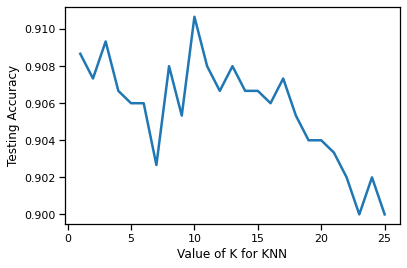

In [121]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Various values of scores for k are given above to indicate the performance of each of the neighbor choices.

<b>Naive Bayes Classification

In [122]:
X=ldata.drop(['ID','ZIP Code','Personal Loan', 'Experience'],axis=1)
Y=ldata['Personal Loan']
print(X.shape)
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

(5000, 10)
(5000,)


In [124]:
from sklearn.naive_bayes import GaussianNB

In [126]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_predict= naive_model.predict(X_test)

In [127]:
# Accuracy of the model
print(metrics.accuracy_score(y_test, y_pred))

0.9


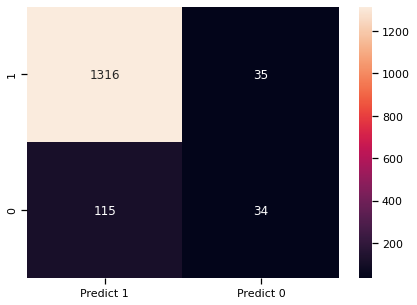

In [128]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1351
           1       0.49      0.23      0.31       149

    accuracy                           0.90      1500
   macro avg       0.71      0.60      0.63      1500
weighted avg       0.88      0.90      0.88      1500



In [130]:
print('Accuracy on train set: {:.2f}'.format(knn_classifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(knn_classifier.score(X_test, y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,y_pred)))
print('Precision score: {:.2f}'.format(precision_score(y_test,y_pred)))

Accuracy on train set: 0.92
Accuracy on test set: 0.91
Recall score: 0.23
ROC AUC score: 0.60
Precision score: 0.49


<h1>Conclusion</h1>

<b>Logistic regression</b> is the best classifier for the dataset as it gives the most accuracy for the dataset and also a higher recall value along with higher ROC/AUC and precision scores.
Accuracy on train set: 0.95
Accuracy on test set: 0.94
Recall score: 0.51
ROC AUC score: 0.75
Precision score: 0.85
Along with accuracy logistic regression is a good choice for the binary classification as it transforms using the sigma function while knn is also a little slower, besides we have to find the right k value for optimum output, which in large dataset can take a long time.
